IMPORT LIBRARY

In [1]:
from pathlib import Path
import re

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


LOADING THE DATASET

In [2]:
df = pd.read_csv("housing_price.csv")

EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [4]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0
508,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1.0,273,21.0,396.90,7.88,11.9


In [5]:
##CHECKING THE SHAPE OF THE DATASET
df.shape

(509, 14)

In [6]:
##CHECKING THE COLUMNS NAMES
col = df.columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509.000000,509.000000,506.000000,509.000000,507.000000,509.000000,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000,508.000000,509.000000
mean,3.707516,11.296660,11.198281,0.068762,0.555216,6.279845,68.579134,3.787705,9.610236,409.216110,18.463851,356.664892,12.705276,22.501572
std,8.732089,23.269781,6.856713,0.253298,0.115633,0.703449,28.114744,2.101852,8.735069,168.814161,2.161553,91.562469,7.131979,9.183497
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.075000,2.100700,4.000000,279.000000,17.400000,375.330000,7.092500,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.150000,3.182700,5.000000,330.000000,19.100000,391.450000,11.430000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


In [10]:
df.nunique()

CRIM       503
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        354
DIS        411
RAD          9
TAX         66
PTRATIO     46
B          356
LSTAT      453
MEDV       228
dtype: int64

In [11]:
##CHECKING DUPLICATE
df.duplicated().sum()

4

In [12]:
##DELETE DUPLICATE
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
##CHECKING MISSING VALUES
df.isna().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

MISSING VALUE

In [15]:
df.dropna().shape

(497, 14)

In [16]:
##SET THE VALUES
df["INDUS"] = df["INDUS"].fillna(df["INDUS"].median())

In [17]:
##SET THE VALUES
df["NOX"] = df["NOX"].fillna(df["NOX"].median())

In [18]:
##SET THE VALUES
df["AGE"] = df["AGE"].fillna(df["AGE"].median())

In [19]:
##SET THE VALUES
df["RAD"] = df["RAD"].fillna(df["RAD"].median())

In [20]:
##SET THE VALUES
df["LSTAT"] = df["LSTAT"].fillna(df["LSTAT"].median())

In [21]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
##CHECKING THE DTYPES DETAIL WISE
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 59.2 KB


In [23]:
# CONVERT TYPE
df["AGE"] = df["AGE"].astype(int)
df["ZN"] = df["ZN"].astype(int)
df["RAD"] = df["RAD"].astype(int)
df["TAX"] = df["TAX"].astype(int)

In [24]:
## AFTER CHANGE TYPE
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    int32  
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    int32  
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int32  
 9   TAX      505 non-null    int32  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(9), int32(4), int64(1)
memory usage: 51.3 KB


In [25]:
##STATISTICAL SUMMARY OF THE DATASET
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,505.0,3.606091,8.608447,0.00632,0.08199,0.25387,3.67367,88.9762
ZN,505.0,11.370297,23.328220,0.00000,0.00000,0.00000,12.00000,100.0000
INDUS,505.0,11.151307,6.843323,0.46000,5.19000,9.69000,18.10000,27.7400
CHAS,505.0,0.069307,0.254227,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,505.0,0.554679,0.115693,0.38500,0.44900,0.53800,0.62400,0.8710
RM,505.0,6.284816,0.703302,3.56100,5.88500,6.20900,6.62500,8.7800
AGE,505.0,68.114851,28.216754,2.00000,45.00000,77.00000,94.00000,100.0000
DIS,505.0,3.798725,2.106167,1.12960,2.10070,3.21570,5.21190,12.1265
RAD,505.0,9.522772,8.690899,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,505.0,407.726733,168.312294,187.00000,279.00000,330.00000,666.00000,711.0000


In [27]:
def plot_hist(df):
    cols = (
        df
        .select_dtypes(include=[int, float])
        .columns
    )
    ncols = 2
    nrows = np.ceil(len(cols) / ncols).astype(int)
    vertical_figsize = 2 * nrows
    fig, axs = plt.subplots(nrows, ncols, figsize=[10, vertical_figsize])
    fig.patch.set_facecolor('lightgray')
    axs = axs.flatten()
    for col, ax in zip(cols, axs):
        df[col].plot.hist(title=col, ax=ax, color='pink')
    plt.tight_layout()
    plt.show()

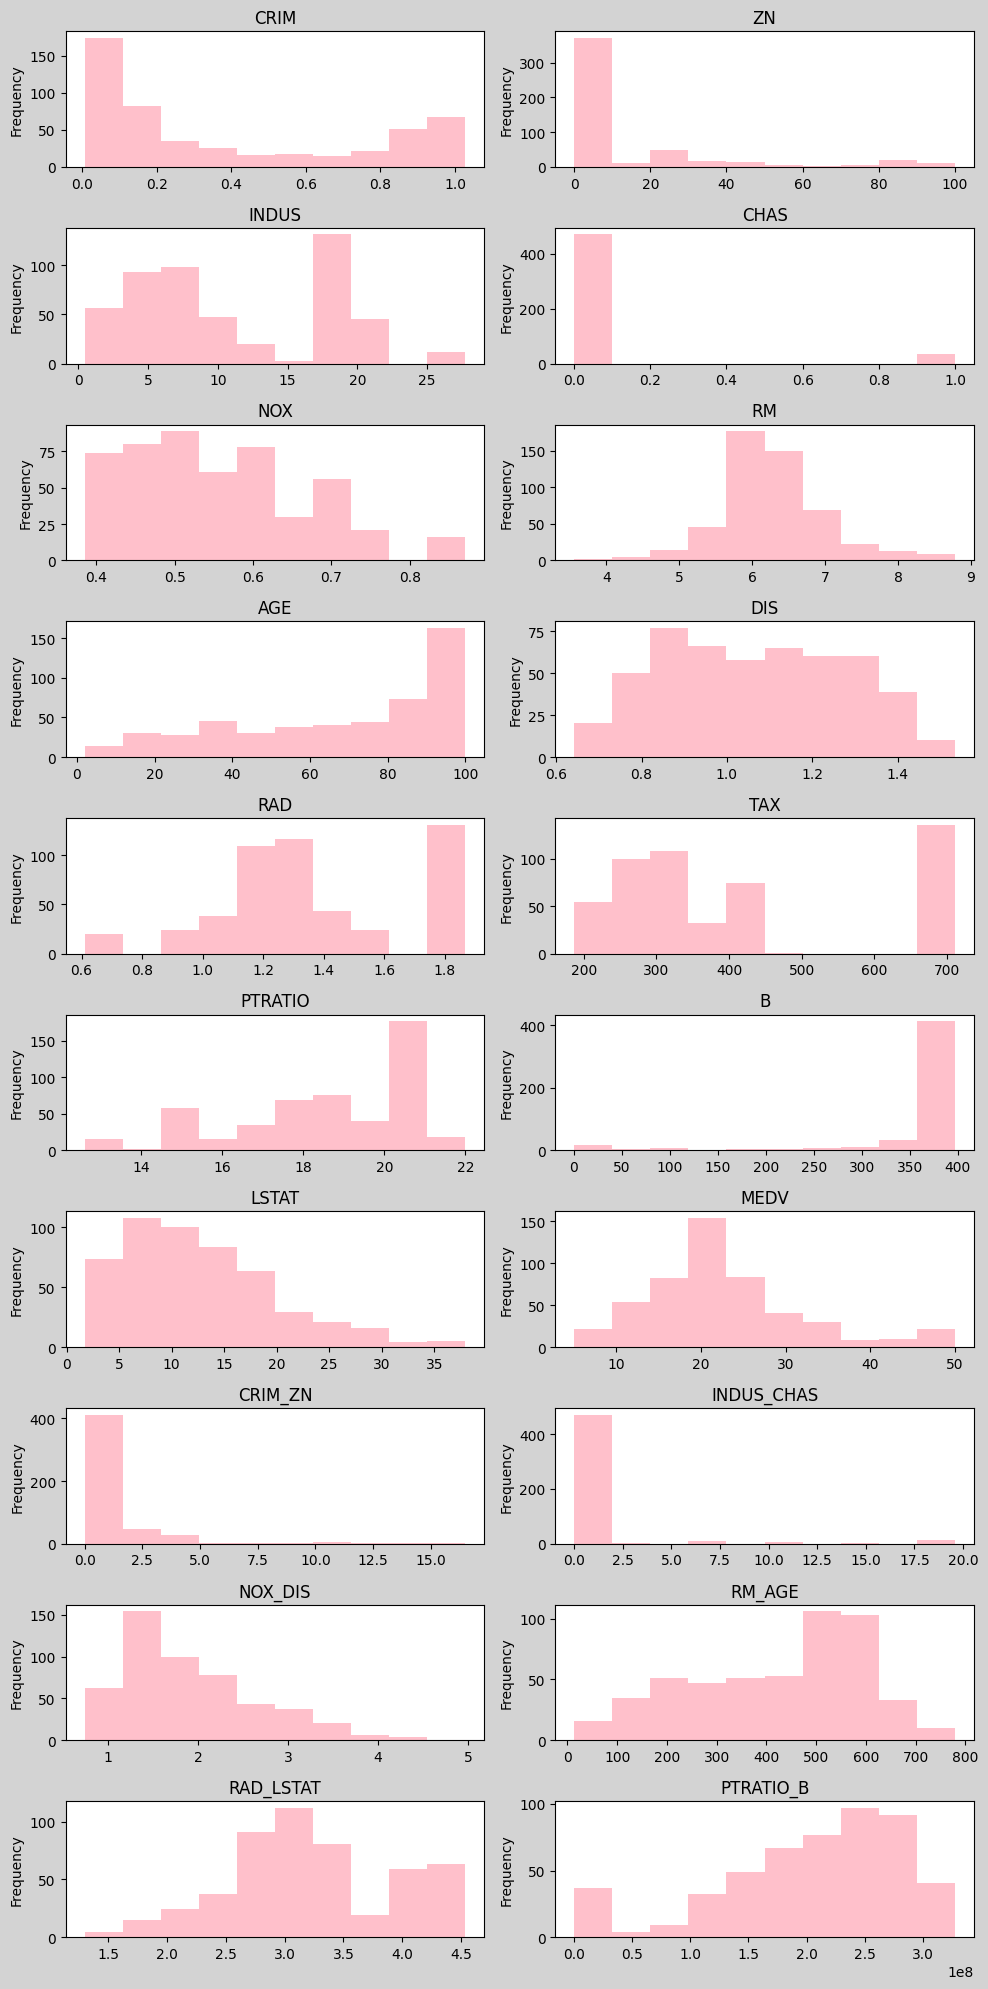

In [111]:
plot_hist(df)

PROCESSING

In [28]:
target = 'TAX'
target = 'MEDV'

In [29]:
df['CRIM_ZN'] = df['CRIM'] * df['ZN']
df['INDUS_CHAS'] = df['INDUS'] * df['CHAS']
df['NOX_DIS'] = df['NOX'] * df['DIS']
df['RM_AGE'] = df['RM'] * df['AGE']
df['RAD_LSTAT'] = df['RAD'] * df['LSTAT']
df['PTRATIO_B'] = df['PTRATIO'] * df['B']

In [30]:
skew_res = df.select_dtypes([int, float]).skew().abs().sort_values(ascending=False)
skew_cols = skew_res.loc[lambda x: (x>=1) & (x.index!=target)].index

print(skew_res)
print('-'*50)
print('Cols that are skewed:')
print(', '.join(skew_cols))

CRIM          5.223410
INDUS_CHAS    4.289043
CRIM_ZN       3.866274
CHAS          3.401726
B             2.928761
ZN            2.224261
PTRATIO_B     2.078090
RAD_LSTAT     1.660685
MEDV          1.108662
RAD           1.012819
DIS           1.009242
NOX_DIS       0.939629
LSTAT         0.918150
PTRATIO       0.799325
NOX           0.735879
TAX           0.675963
AGE           0.593229
RM_AGE        0.445334
RM            0.402463
INDUS         0.294479
dtype: float64
--------------------------------------------------
Cols that are skewed:
CRIM, INDUS_CHAS, CRIM_ZN, CHAS, B, ZN, PTRATIO_B, RAD_LSTAT, RAD, DIS


In [31]:
def best_transformation(data) -> tuple:
    functions = [np.log1p, np.sqrt, stats.yeojohnson]
    results = []
    
    for func in functions:
        transformed_data = func(data)
        if type(transformed_data) == tuple:
            vals, _ = transformed_data
            results.append(vals)
        else:
            results.append(transformed_data)
            
    abs_skew_results = [np.abs(stats.skew(val)) for val in results]
    lowest_skew_index = abs_skew_results.index(min(abs_skew_results))
    return functions[lowest_skew_index], results[lowest_skew_index]

----------------------------------------------------------------------------------------------------
CRIM skew is: 5.207882130237598
Best function <function yeojohnson at 0x000001FAFF986520> and the skew results: 0.5971108677374487


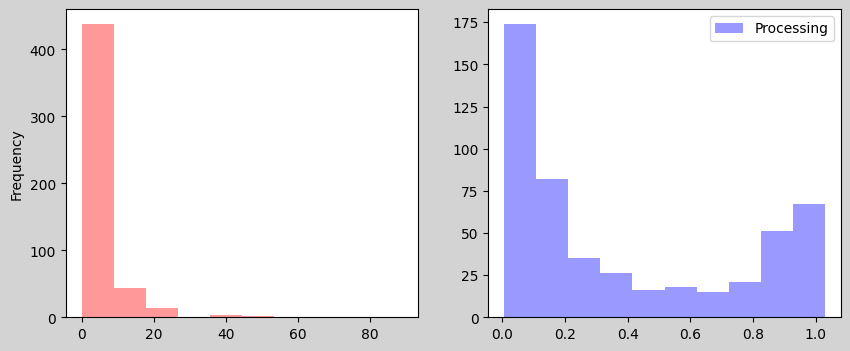

----------------------------------------------------------------------------------------------------
INDUS_CHAS skew is: 4.27629231640458
Best function <function yeojohnson at 0x000001FAFF986520> and the skew results: 3.3916316839780345


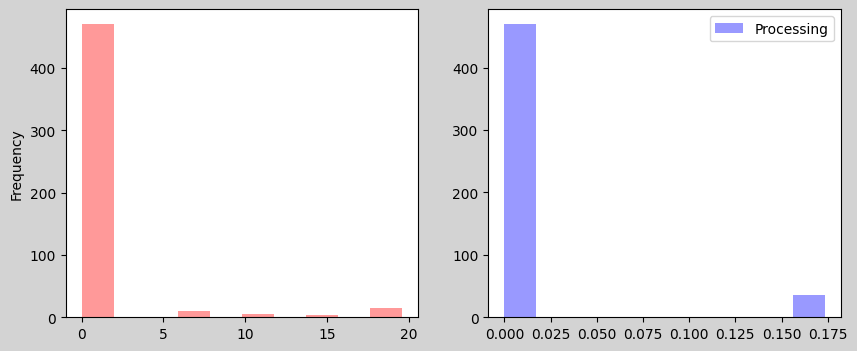

Transformation was not successful for INDUS_CHAS, returning original data
----------------------------------------------------------------------------------------------------
CRIM_ZN skew is: 3.8547806172795185
Best function <function yeojohnson at 0x000001FAFF986520> and the skew results: 1.107145826307136


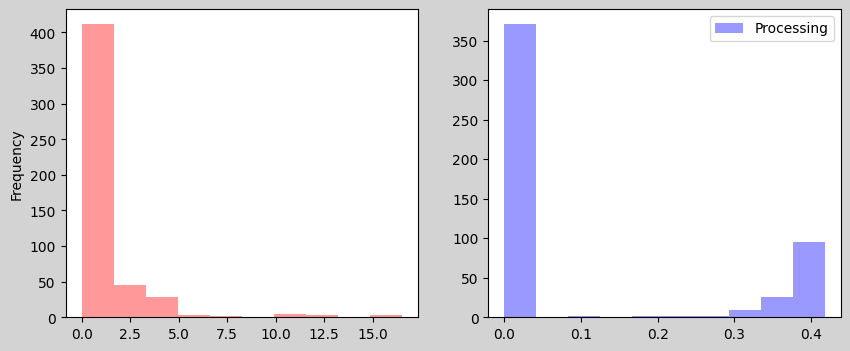

Transformation was not successful for CRIM_ZN, returning original data
----------------------------------------------------------------------------------------------------
CHAS skew is: 3.3916131137967094
Best function <ufunc 'log1p'> and the skew results: 3.3916131137967094


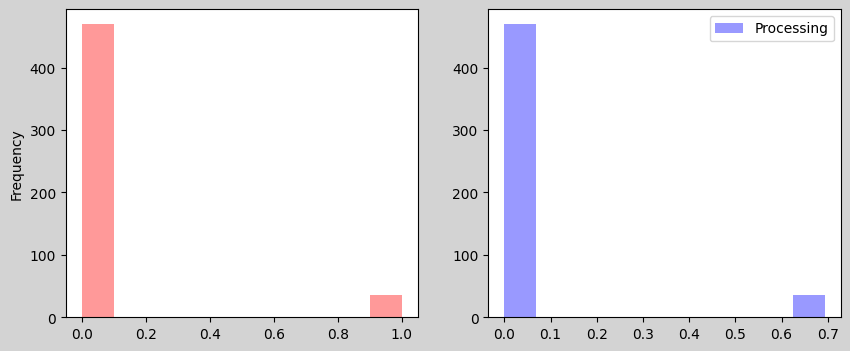

Transformation was not successful for CHAS, returning original data
----------------------------------------------------------------------------------------------------
B skew is: -2.9200540251712503
Best function <function yeojohnson at 0x000001FAFF986520> and the skew results: -1.9134669715515502


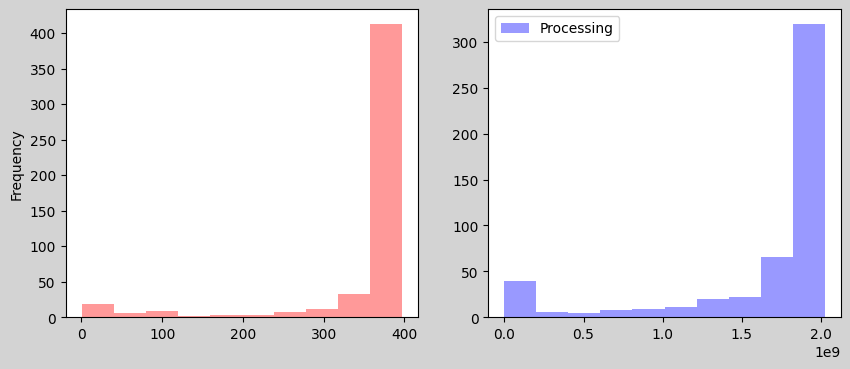

Transformation was not successful for B, returning original data
----------------------------------------------------------------------------------------------------
ZN skew is: 2.2176485715362144
Best function <function yeojohnson at 0x000001FAFF986520> and the skew results: 1.0656202518570272


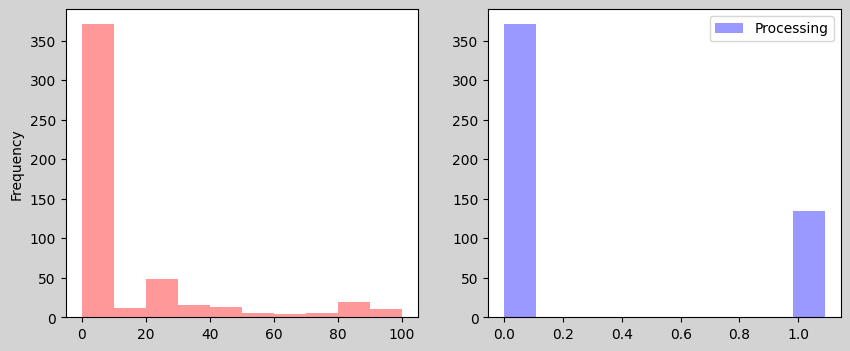

Transformation was not successful for ZN, returning original data
----------------------------------------------------------------------------------------------------
PTRATIO_B skew is: -2.0719125268867025
Best function <function yeojohnson at 0x000001FAFF986520> and the skew results: -0.8842448562512275


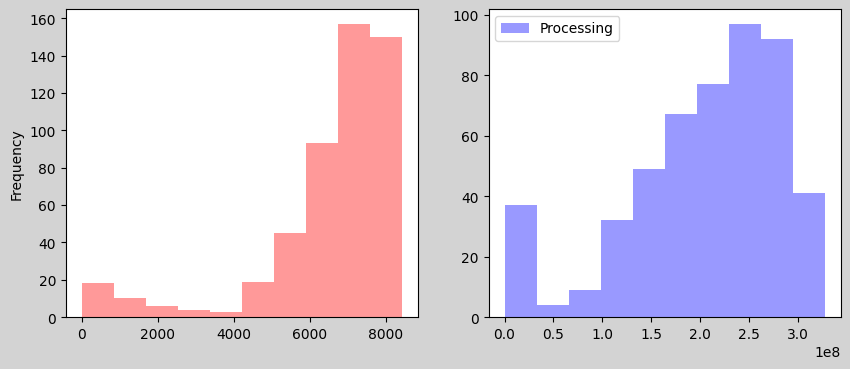

----------------------------------------------------------------------------------------------------
RAD_LSTAT skew is: 1.655748342768243
Best function <function yeojohnson at 0x000001FAFF986520> and the skew results: 0.036112577705346025


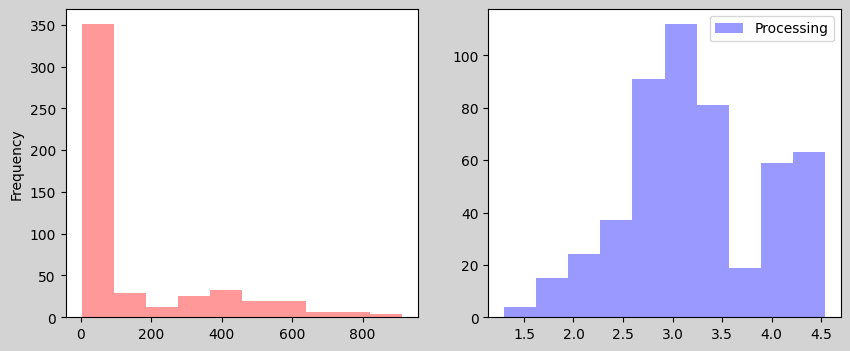

----------------------------------------------------------------------------------------------------
RAD skew is: 1.0098085122259308
Best function <function yeojohnson at 0x000001FAFF986520> and the skew results: 0.06475239131344185


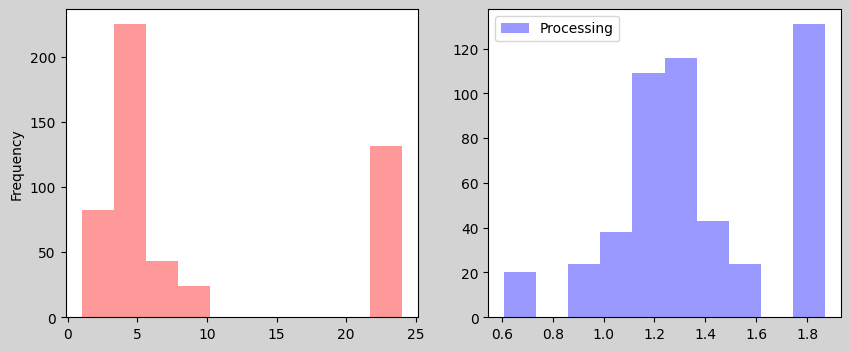

----------------------------------------------------------------------------------------------------
DIS skew is: 1.0062415748072984
Best function <function yeojohnson at 0x000001FAFF986520> and the skew results: 0.06606618319401818


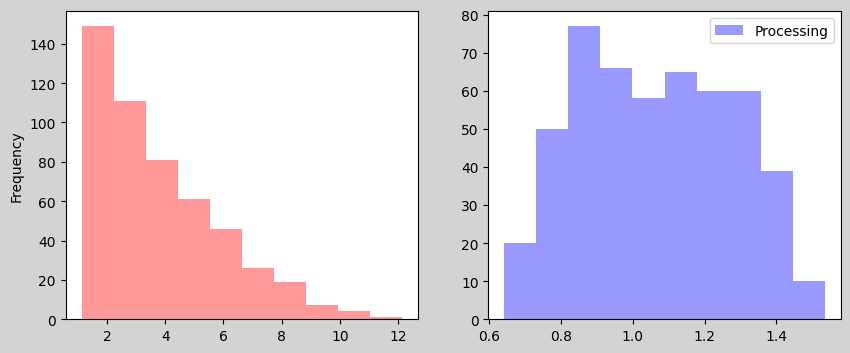

In [32]:
def unskew(col):
    global best_transformation
    print('-' * 100)
    col_skew = stats.skew(col)
    col_name = col.name
    print('{} skew is: {}'.format(col_name, col_skew))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4])
    fig.patch.set_facecolor('lightgray')
    col.plot.hist(color='red', alpha=0.4, label='pre-skew', ax=ax1)

    if np.abs(col_skew) >= 1.:
        result_skew, data = best_transformation(col)
        new_col_skew = stats.skew(data)
        print(f'Best function {result_skew} and the skew results: {new_col_skew}')
        ax2.hist(data, label='Processing', color='blue', alpha=0.4)
        ax2.legend()
        plt.show()

        if np.abs(new_col_skew) >= 1.:
            print(f'Transformation was not successful for {col_name}, returning original data')
            return col

        return data

    plt.show()

skew_cols = ['CRIM', 'INDUS_CHAS', 'CRIM_ZN', 'CHAS', 'B', 'ZN', 'PTRATIO_B', 'RAD_LSTAT', 'RAD', 'DIS']  # LIST OF COLUMNS TO CHANGE

df[skew_cols] = df[skew_cols].apply(unskew)

In [34]:
##FEATURE SLECTION
corr_ranking = (
    df
    .drop(target, axis=1)
    .corrwith(df[target])
    .abs()
    .sort_values(ascending=False)
)

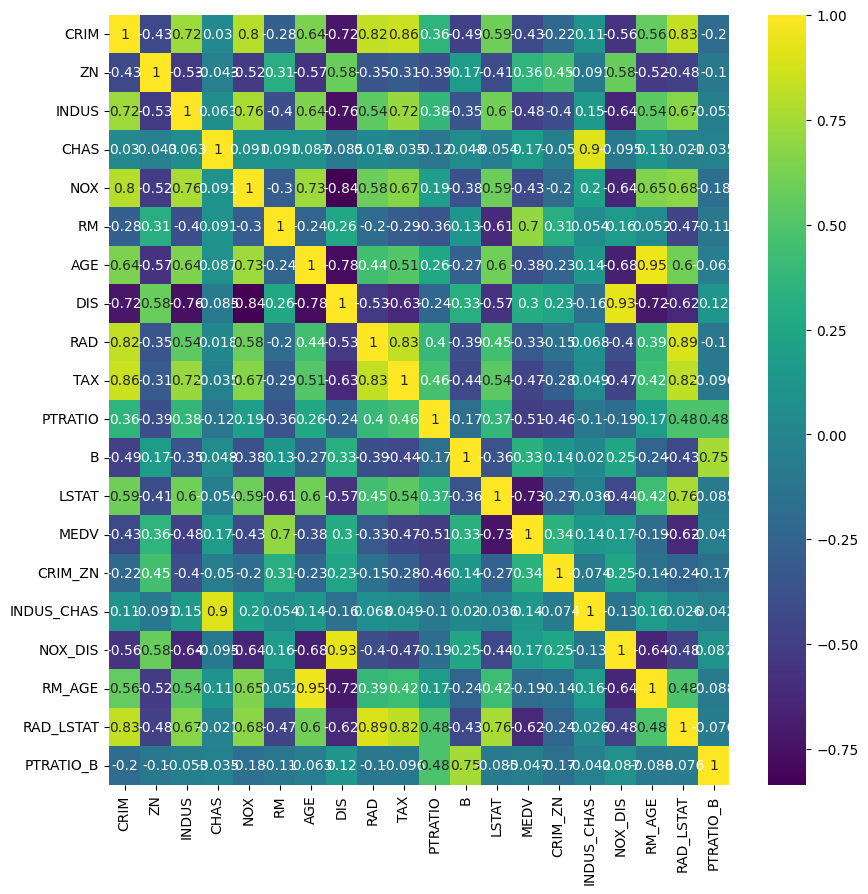

In [113]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

A correlation whose magnitude is between 0.9 and 1.0 can be considered very highly correlated. A correlation whose magnitude is between 0.7 and 0.9 can be considered highly correlated. Correlation whose magnitude is between 0.5 and 0.7 indicates a variable that can be considered moderately correlated. Correlation whose size is between 0.3 and 0.5 indicates a variable that has a low correlation. Correlation whose magnitude is less than 0.3 has a small (linear) correlation if any.

In [63]:
##TAKES ALL VALUES FROM LARGEST TO SMALLEST
threshold = 0.0
chosen_cols = corr_ranking[corr_ranking>=threshold]
print(chosen_cols)
chosen_cols = chosen_cols.index.to_list()

LSTAT         0.734954
RM            0.696134
RAD_LSTAT     0.624044
PTRATIO       0.506899
INDUS         0.484554
TAX           0.466541
CRIM          0.426657
NOX           0.426326
AGE           0.376773
ZN            0.360016
CRIM_ZN       0.343270
B             0.329548
RAD           0.327940
DIS           0.295066
RM_AGE        0.192451
CHAS          0.174868
NOX_DIS       0.167917
INDUS_CHAS    0.139211
PTRATIO_B     0.047279
dtype: float64


TRAIN TEST SPLIT

In [64]:
X = df[chosen_cols]
y = df[target]

In [65]:
X.shape, y.shape

((505, 19), (505,))

In [68]:
from sklearn.model_selection import train_test_split


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
X_train.dtypes

LSTAT         float64
RM            float64
RAD_LSTAT     float64
PTRATIO       float64
INDUS         float64
TAX             int32
CRIM          float64
NOX           float64
AGE             int32
ZN              int32
CRIM_ZN       float64
B             float64
RAD           float64
DIS           float64
RM_AGE        float64
CHAS            int64
NOX_DIS       float64
INDUS_CHAS    float64
PTRATIO_B     float64
dtype: object

SCALING

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

cols = X_train.select_dtypes([float, int]).columns.to_list()

X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test)

REGRESSION

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [75]:
n_features = X_train.shape[1]

In [76]:
linear_reg_params = {
    'fit_intercept': [True, False],
}

In [77]:
random_forest_params = {
    'n_estimators': np.sort(np.random.default_rng().choice(500, size=10, replace=False)),
    'max_features': np.sort(np.random.default_rng().choice(n_features, size=5, replace=False)),
    'max_depth': [1, 5, 10],
}

In [78]:
xgb_params = {
    'objective': ['reg:squarederror'],
    'max_depth': [2, 5,],
    'min_child_weight': np.arange(1, 5, 2),
    'n_estimators': np.sort(np.random.default_rng().choice(500, size=3, replace=False)),
    'learning_rate': [1e-1, 1e-2,],
    'gamma': np.sort(np.random.default_rng().choice(20, size=3, replace=False)),
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5],
    'n_jobs': [-1],
}

In [79]:
best_mode_params = {
    LinearRegression(): {'fit_intercept': True},
    RandomForestRegressor(): {'max_depth': 10, 'max_features': 9, 'n_estimators': 378},
    XGBRegressor(): {'gamma': 18, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 461, 'n_jobs': -1, 'objective': 'reg:squarederror', 'reg_lambda': 0, 'scale_pos_weight': 1},
}

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
b_models = []
model_results = []

for model in best_mode_params.keys():
    params = best_mode_params[model]
    model.set_params(**params)
    model.fit(X_train, y_train)    
    b_models.append(model)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    model_name = re.search(r'\w+', str(model))[0]
    results = pd.Series({'MSE': mse, 'RMSE': rmse, 'R2': r2}, name=model_name)
    model_results.append(results)

RESULTS

In [82]:
pd.concat(model_results, axis=1)

,LinearRegression,RandomForestRegressor,XGBRegressor
MSE,14.699898,7.331241,7.450094
RMSE,3.834045,2.707626,2.729486
R2,0.826901,0.913671,0.912271


In [109]:
feature_imp = []
for model in b_models:
    try:
        model_name = re.search(r'\w+', str(model))[0]
        feature_imp.append(
            pd.Series(
                {
                    col: importance 
                    for col, importance in zip(cols, model.feature_importances_)
                },
                name = model_name
            )
        )
    except AttributeError:
        pass
    
pd.concat(feature_imp, axis=1).sort_values(by='XGBRegressor', ascending=False)

,RandomForestRegressor,XGBRegressor
LSTAT,0.288331,0.298713
RM,0.324429,0.273483
RAD_LSTAT,0.096810,0.104293
DIS,0.041650,0.065250
NOX,0.027767,0.045835
PTRATIO,0.039474,0.040784
CRIM,0.023212,0.039476
PTRATIO_B,0.018802,0.030594
NOX_DIS,0.052029,0.025307
CHAS,0.000631,0.017719


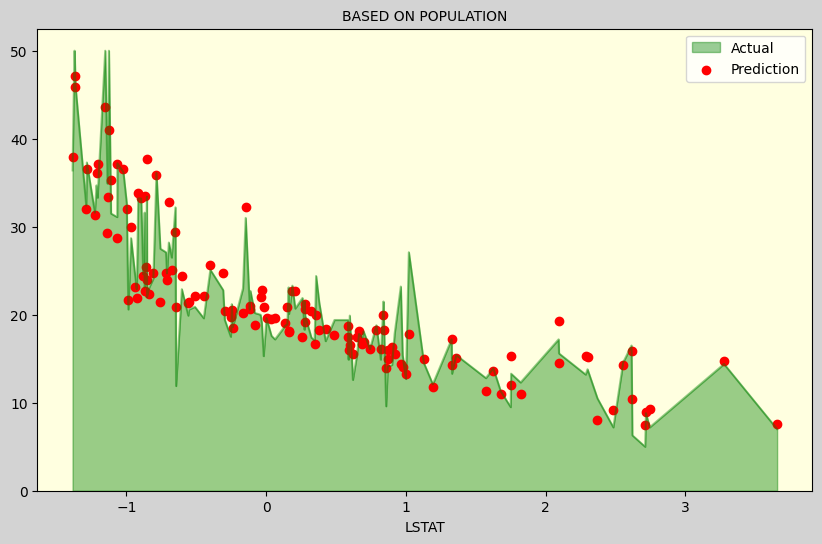

In [177]:
xgb_model = b_models[2]
col = 'LSTAT'
y_pred = xgb_model.predict(X_test.sort_values(by=col))

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgray')

(
    pd.concat([X_test[col], y_test], axis=1)
    .sort_values(by=col)
    .plot.area(x=col, y='MEDV', color='green', alpha=0.4, label='Actual', ax=ax)
)

plt.scatter(X_test[col].sort_values(), y_pred, color='red', label='Prediction')
plt.legend()
plt.title("BASED ON POPULATION", size=10)
ax.set_facecolor('lightyellow')
plt.show()

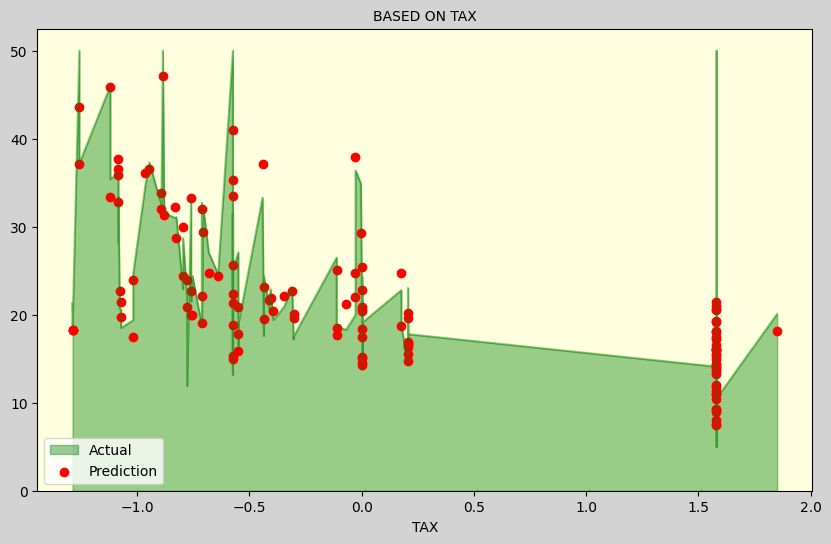

In [178]:
xgb_model = b_models[2]
col = 'TAX'
y_pred = xgb_model.predict(X_test.sort_values(by=col))

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgray')

(
    pd.concat([X_test[col], y_test], axis=1)
    .sort_values(by=col)
    .plot.area(x=col, y='MEDV', color='green', alpha=0.4, label='Actual', ax=ax)
)

plt.scatter(X_test[col].sort_values(), y_pred, color='red', label='Prediction')
plt.legend()
plt.title("BASED ON TAX", size=10)
ax.set_facecolor('lightyellow')
plt.show()

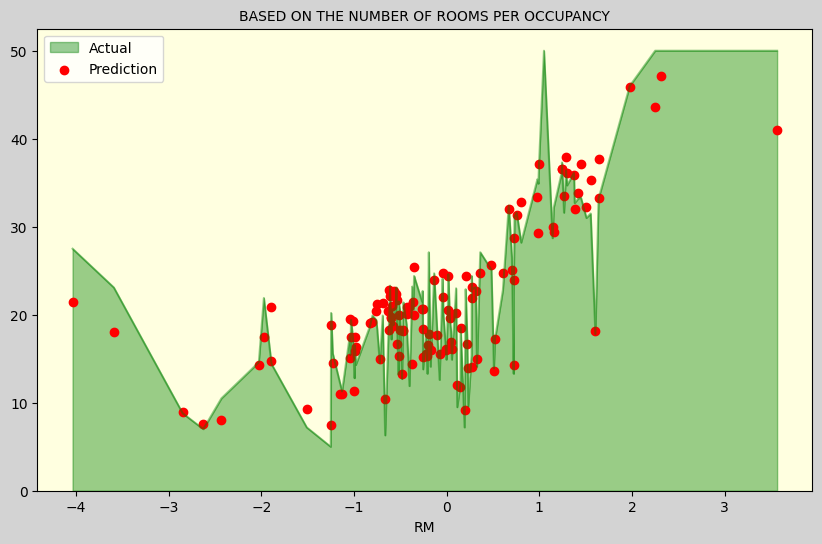

In [179]:
xgb_model = b_models[2]
col = 'RM'
y_pred = xgb_model.predict(X_test.sort_values(by=col))

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgray')

(
    pd.concat([X_test[col], y_test], axis=1)
    .sort_values(by=col)
    .plot.area(x=col, y='MEDV', color='green', alpha=0.4, label='Actual', ax=ax)
)

plt.scatter(X_test[col].sort_values(), y_pred, color='red', label='Prediction')
plt.legend()
plt.title("BASED ON THE NUMBER OF ROOMS PER OCCUPANCY", size=10)
ax.set_facecolor('lightyellow')
plt.show()